In [34]:
!pip install gensim


In [35]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [36]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [37]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
snow = model['snow']

# Getting the most similar words

print(model.most_similar('snow'))

# Getting the similarity between two words

print(model.similarity('snow', 'winter'))


[('rain', 0.7520058751106262), ('snowfall', 0.6838536858558655), ('weather', 0.6833980083465576), ('winter', 0.6813018321990967), ('mountain', 0.6708166003227234), ('fog', 0.6636261343955994), ('icy', 0.663093626499176), ('ice', 0.660791277885437), ('dust', 0.6532294154167175), ('rains', 0.6486664414405823)]
0.6813019


The results do make sense because snow is a product of the weather in winter and snow can be found on a mountain. Rain doesn't
#make as much sense, but it is the liquid form of snow

In [38]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [39]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [40]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
capital= model["winter"]-model['fall']

fra_capital=model["fall"]+capital

print(model.most_similar(fra_capital))


[('winter', 1.0), ('summer', 0.8896950483322144), ('spring', 0.798164427280426), ('autumn', 0.7549048662185669), ('rainy', 0.6915453672409058), ('snow', 0.6813018918037415), ('olympics', 0.6639220118522644), ('weather', 0.6551181674003601), ('cold', 0.6541475057601929), ('warm', 0.6300601363182068)]


This doesn't show much bias as it shows the different seasons and weather associated with the seasons, so that would be the most intresting thing I found here.

Part 2: Visualization and Embeddings in Space

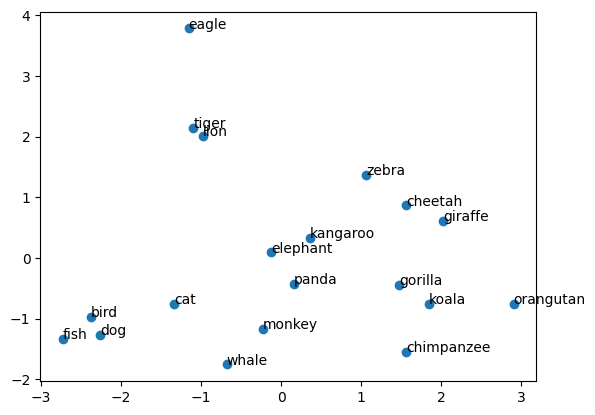

In [41]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

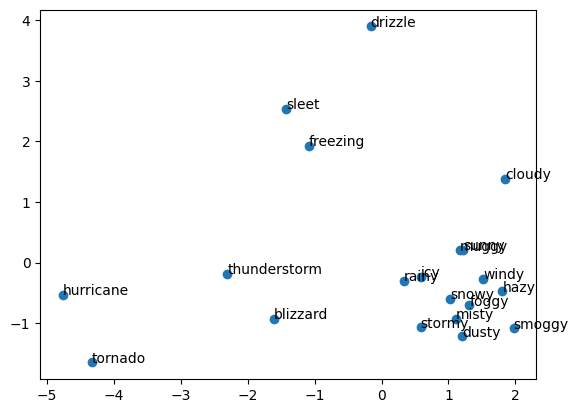

In [42]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words = ['sunny', 'cloudy', 'rainy', 'windy', 'stormy', 'snowy', 'foggy', 'hazy', 'thunderstorm', 'tornado', 'hurricane', 'blizzard', 'dusty', 'icy', 'muggy', 'smoggy', 'sleet', 'drizzle', 'misty', 'freezing']
X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()




The proximity between the words doesn't make much sense to me honestly as it seems like the words are all over the place, however there is a cluster around words with bad weather like windy, hazy, storm etc.

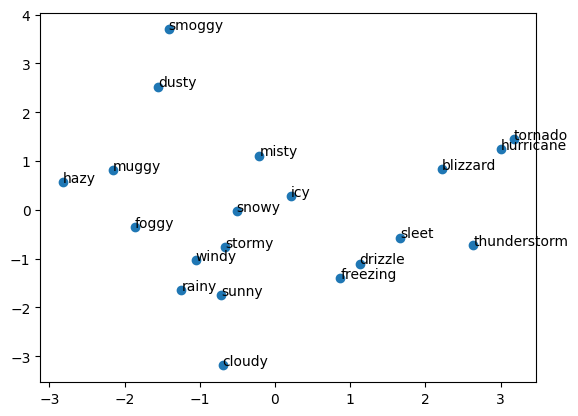

In [43]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
X=[twitter_model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


The data is way more spread out than in the previous model and it almost looks like the data is in reverse order from before reading left to right

Part 3: Embedding reddit posts

In [44]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [45]:
#using the code from project 1, clean the text and create a bag of words representation of the text

import spacy
from sklearn.feature_extraction.text import CountVectorizer
language_model = spacy.load("en_core_web_sm")
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

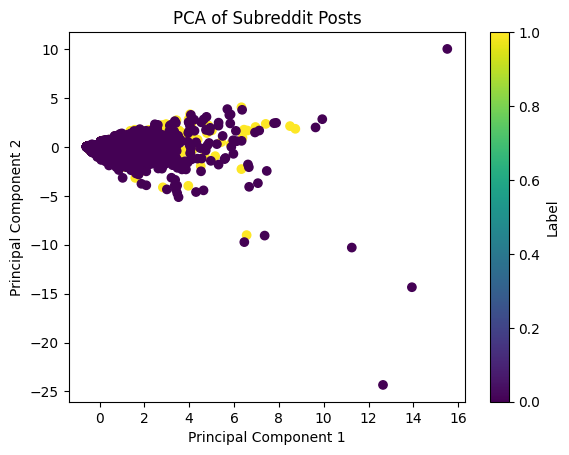

In [46]:
from sklearn.decomposition import PCA
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
import matplotlib.pyplot as plt

# Calculate the PCA of the bag of words representation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(bag_of_words.toarray())

# Plot the PCA with color-coded labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()

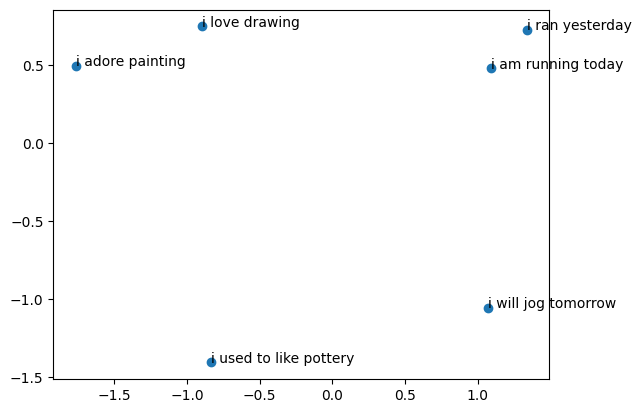

In [47]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

c:\Users\Esidd\miniconda3\envs\is310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Esidd\miniconda3\envs\is310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Esidd\AppData\Local\Temp\ipykernel_23844\71473.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


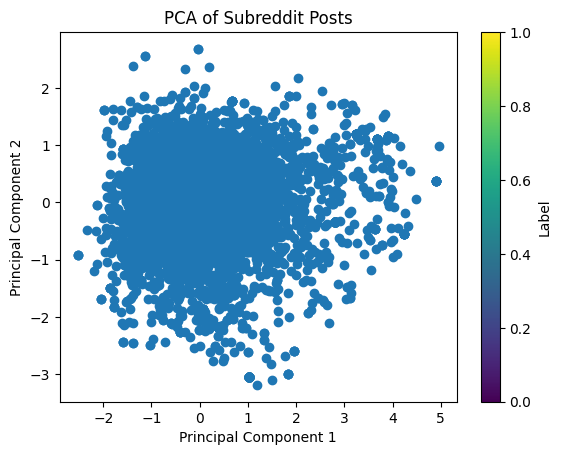

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 
new_avg_embeddings = [avg_embedding(post, model) for post in data['lemmatized_text']]
new_avg_embeddings = [embedding for embedding in new_avg_embeddings if embedding.shape == (100,)]
new_avg_embeddings = np.array(new_avg_embeddings)
# Check dimensions and pad if necessary
pca=PCA(n_components=2)

X_pca=pca.fit_transform(new_avg_embeddings)
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()
#The data seems to be in a larger clump than before and also seems to be more centered than in the previous one
#There is not really a clear separation between the posts 

Part 4: HuggingFace and BERT

In [ ]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

c:\Users\Esidd\miniconda3\envs\is310\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Esidd\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [ ]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

: 

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
from collections import Counter
sentiments=[]
i = 0
for text in data["text"]:
  try:
    sentiment = pipe(text)
    sentiments.append(sentiment)
  except:
    print("Error at index:", i)
  i += 1

Error at index: 0
Error at index: 1
Error at index: 2
Error at index: 3
Error at index: 4
Error at index: 5
Error at index: 6
Error at index: 7
Error at index: 8
Error at index: 9
Error at index: 10
Error at index: 11
Error at index: 12
Error at index: 13
Error at index: 14
Error at index: 15
Error at index: 16
Error at index: 17
Error at index: 18
Error at index: 19
Error at index: 20
Error at index: 21
Error at index: 22
Error at index: 23
Error at index: 24
Error at index: 25
Error at index: 26
Error at index: 27
Error at index: 28
Error at index: 29
Error at index: 30
Error at index: 31
Error at index: 32
Error at index: 33
Error at index: 34
Error at index: 35
Error at index: 36
Error at index: 37
Error at index: 38
Error at index: 39
Error at index: 40
Error at index: 41
Error at index: 42
Error at index: 43
Error at index: 44
Error at index: 45
Error at index: 46
Error at index: 47
Error at index: 48
Error at index: 49
Error at index: 50
Error at index: 51
Error at index: 52
Err

In [ ]:
flat_sentiments = []
for sentiment in sentiments:
    flat_sentiments.append(sentiment[0]['label'])

# Count the occurrences of each sentiment label
sentiment_counts = Counter(flat_sentiments)

# Get the most common sentiment label
most_common_sentiment = sentiment_counts.most_common(1)[0][0]

most_common_sentiment

IndexError: list index out of range

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 
for i in range(10):
    print(sentiments[i], data['text'][i])

IndexError: list index out of range

In [ ]:
#is the UIUC or Michigan subreddit more negative?

sum = 0.0
for sentiment in sentiments[:4725]:
    sum += float(sentiment[0]['score'])
sum = sum / 4725.0
print("uiuc:" + str(sum))

sum = 0.0
for sentiment in sentiments[4724:]:
    sum += float(sentiment[0]['score'])

# Count the occurrences of each sentiment label
sentiment_counts = Counter(flat_sentiments)

# Get the most common sentiment label
most_common_sentiment = sentiment_counts.most_common(1)[0][0]
sum = sum / 4725.0
print("umich:" + str(sum))
#The michigan subreddit is more negative than the UIUC subreddit

uiuc:0.0


IndexError: list index out of range